In [302]:
#from google.colab import drive
#drive.mount('/content/drive')

In [303]:
import pandas as pd
import numpy as np

In [304]:
names = ['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','state','district','cluster14','cluster15','cluster18','cluster20','cluster25','cluster27','cluster30','cluster35']

In [305]:
df = pd.read_csv("/content/drive/MyDrive/agroclimatic_clusters.csv")

In [306]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
0,1958,1,0,32.1,16.6,2,-0.1,maharashtra,solapur,8,7,0,7,12,23,15,23
1,1958,2,0,34.2,18.4,2,-0.5,maharashtra,solapur,8,7,0,7,12,23,15,23
2,1958,3,17,38.5,21.5,17,0.2,maharashtra,solapur,8,7,0,7,12,23,15,23
3,1958,4,32,40.2,25.3,32,0.8,maharashtra,solapur,8,7,0,7,12,23,15,23
4,1958,5,68,40.5,25.8,65,1.5,maharashtra,solapur,8,7,0,7,12,23,15,23


In [307]:
df['cluster15'].value_counts()

5     89280
11    62496
4     55800
7     55056
14    31992
1     29760
8     27528
2     24552
9     22320
12    14136
0     10416
13     6696
6      5952
3      4464
10     1488
Name: cluster15, dtype: int64

In [308]:
a = []
for i in range(len(df)):
    if df['cluster15'][i]!=12:
        a.append(i)

In [309]:
df = df.drop(a)

In [310]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
1488,1958,1,18,24.7,12.7,41,0.2,assam,bongaigaon,7,12,14,18,8,25,12,14
1489,1958,2,18,25.2,13.7,41,0.5,assam,bongaigaon,7,12,14,18,8,25,12,14
1490,1958,3,29,30.6,16.8,52,-0.4,assam,bongaigaon,7,12,14,18,8,25,12,14
1491,1958,4,229,31.8,21.3,126,0.2,assam,bongaigaon,7,12,14,18,8,25,12,14
1492,1958,5,461,31.3,23.5,129,0.0,assam,bongaigaon,7,12,14,18,8,25,12,14


In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14136 entries, 1488 to 418127
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            14136 non-null  int64  
 1   Month           14136 non-null  int64  
 2   ppt(mm)         14136 non-null  int64  
 3   tmax(degC)      14136 non-null  float64
 4   tmin(degC)      14136 non-null  float64
 5   aet(mm)         14136 non-null  int64  
 6   PDSI(unitless)  14136 non-null  float64
 7   state           14136 non-null  object 
 8   district        14136 non-null  object 
 9   cluster14       14136 non-null  int64  
 10  cluster15       14136 non-null  int64  
 11  cluster18       14136 non-null  int64  
 12  cluster20       14136 non-null  int64  
 13  cluster25       14136 non-null  int64  
 14  cluster27       14136 non-null  int64  
 15  cluster30       14136 non-null  int64  
 16  cluster35       14136 non-null  int64  
dtypes: float64(3), int64(12), o

In [312]:
conditions = df[['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','district']]
conditions.shape

(14136, 8)

In [313]:
conditions.isnull().sum(axis = 0)

Year              0
Month             0
ppt(mm)           0
tmax(degC)        0
tmin(degC)        0
aet(mm)           0
PDSI(unitless)    0
district          0
dtype: int64

In [314]:
conditions["date"] = conditions['Month'].astype('str')+'-'+conditions["Year"].astype(str)
conditions.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date
1488,1958,1,18,24.7,12.7,41,0.2,bongaigaon,1-1958
1489,1958,2,18,25.2,13.7,41,0.5,bongaigaon,2-1958
1490,1958,3,29,30.6,16.8,52,-0.4,bongaigaon,3-1958
1491,1958,4,229,31.8,21.3,126,0.2,bongaigaon,4-1958
1492,1958,5,461,31.3,23.5,129,0.0,bongaigaon,5-1958


In [315]:
conditions['Day'] = [1] * len(conditions['Month'])
conditions['date'] = pd.to_datetime(conditions[['Year','Month','Day']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [316]:
conditions.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date,Day
1488,1958,1,18,24.7,12.7,41,0.2,bongaigaon,1958-01-01,1
1489,1958,2,18,25.2,13.7,41,0.5,bongaigaon,1958-02-01,1
1490,1958,3,29,30.6,16.8,52,-0.4,bongaigaon,1958-03-01,1
1491,1958,4,229,31.8,21.3,126,0.2,bongaigaon,1958-04-01,1
1492,1958,5,461,31.3,23.5,129,0.0,bongaigaon,1958-05-01,1


In [317]:
conditions['mid_temp'] = 0.5*(conditions['tmax(degC)']+conditions['tmin(degC)'])
conditions.drop(columns = ['tmax(degC)','tmin(degC)'],inplace = True)
conditions.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
1488,1958,1,18,41,0.2,bongaigaon,1958-01-01,1,18.70
1489,1958,2,18,41,0.5,bongaigaon,1958-02-01,1,19.45
1490,1958,3,29,52,-0.4,bongaigaon,1958-03-01,1,23.70
1491,1958,4,229,126,0.2,bongaigaon,1958-04-01,1,26.55
1492,1958,5,461,129,0.0,bongaigaon,1958-05-01,1,27.40


In [318]:
conditions.tail()

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
418123,2019,8,767,98,-3.1,lunglei,2019-08-01,1,24.10
418124,2019,9,558,91,-2.5,lunglei,2019-09-01,1,23.10
418125,2019,10,202,96,-2.7,lunglei,2019-10-01,1,22.85
418126,2019,11,33,63,-2.9,lunglei,2019-11-01,1,20.45
418127,2019,12,8,45,-2.9,lunglei,2019-12-01,1,16.40


In [319]:
conditions_truncated = conditions.loc[(conditions['Year']>1980) & (conditions['Year']<2019)]
conditions_val = conditions.loc[conditions['Year']==2019]

train = conditions_truncated[['date','ppt(mm)','mid_temp','aet(mm)','district']]
train.rename(columns = {'mid_temp':'y'}, inplace = True)

train.reset_index(inplace = True)
train.drop(columns = 'index',inplace = True)
train.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,ppt(mm),y,aet(mm),district
0,1981-01-01,46,17.30,53,bongaigaon
1,1981-02-01,10,20.30,39,bongaigaon
2,1981-03-01,67,22.75,81,bongaigaon
3,1981-04-01,280,24.70,116,bongaigaon
4,1981-05-01,579,26.45,131,bongaigaon


In [320]:
conditions_val

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
2220,2019,1,3,31,-4.1,bongaigaon,2019-01-01,1,18.00
2221,2019,2,40,48,-2.8,bongaigaon,2019-02-01,1,19.75
2222,2019,3,42,59,-3.1,bongaigaon,2019-03-01,1,22.75
2223,2019,4,136,130,-3.4,bongaigaon,2019-04-01,1,26.75
2224,2019,5,498,118,-3.3,bongaigaon,2019-05-01,1,26.80
...,...,...,...,...,...,...,...,...,...
418123,2019,8,767,98,-3.1,lunglei,2019-08-01,1,24.10
418124,2019,9,558,91,-2.5,lunglei,2019-09-01,1,23.10
418125,2019,10,202,96,-2.7,lunglei,2019-10-01,1,22.85
418126,2019,11,33,63,-2.9,lunglei,2019-11-01,1,20.45


In [321]:
from fbprophet import Prophet

In [322]:

model = Prophet()

In [323]:
conditions_truncated.rename(columns = {'date':'ds'}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [324]:
train.rename(columns = {'date':'ds'}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [325]:
train.tail()


,ds,ppt(mm),y,aet(mm),district
8659,2018-08-01,519,23.15,99,lunglei
8660,2018-09-01,362,22.55,101,lunglei
8661,2018-10-01,276,20.60,91,lunglei
8662,2018-11-01,6,17.85,55,lunglei
8663,2018-12-01,19,15.85,45,lunglei


In [326]:
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [327]:
fut = model.make_future_dataframe(periods = 13, freq = 'M')

In [328]:

forecast = model.predict(fut)

In [329]:
forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
464,2019-08-31,23.038754,21.304900,30.372773,23.037466,23.039559,2.529047,2.529047,2.529047,2.529047,2.529047,2.529047,0.0,0.0,0.0,25.567801
465,2019-09-30,23.035039,19.731680,29.455400,23.033354,23.036149,1.508953,1.508953,1.508953,1.508953,1.508953,1.508953,0.0,0.0,0.0,24.543992
466,2019-10-31,23.031200,17.361250,26.777625,23.029120,23.032656,-1.147290,-1.147290,-1.147290,-1.147290,-1.147290,-1.147290,0.0,0.0,0.0,21.883911
467,2019-11-30,23.027485,14.129041,23.072249,23.025136,23.029228,-4.429982,-4.429982,-4.429982,-4.429982,-4.429982,-4.429982,0.0,0.0,0.0,18.597503
468,2019-12-31,23.023647,12.425561,21.542852,23.021051,23.025726,-5.946187,-5.946187,-5.946187,-5.946187,-5.946187,-5.946187,0.0,0.0,0.0,17.077459


In [330]:

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
464,2019-08-31,25.567801,21.304900,30.372773
465,2019-09-30,24.543992,19.731680,29.455400
466,2019-10-31,21.883911,17.361250,26.777625
467,2019-11-30,18.597503,14.129041,23.072249
468,2019-12-31,17.077459,12.425561,21.542852


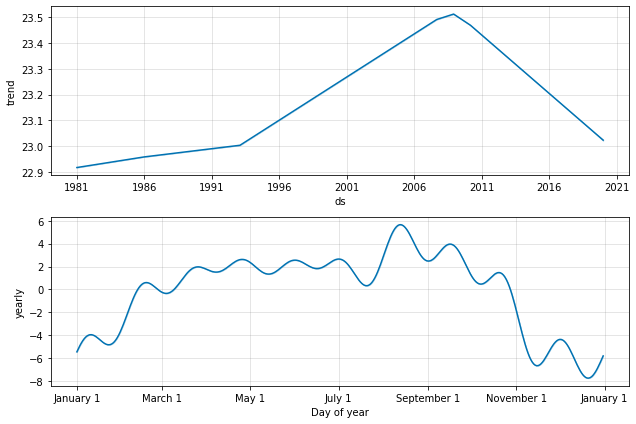

In [331]:
fig2 = model.plot_components(forecast)

In [332]:
forecast_2019 = forecast.tail(12)
forecast_2019["Month"] = forecast_2019["ds"].dt.month
print (forecast_2019[["yhat"]].shape,conditions_val[["mid_temp"]].shape)
test = pd.merge(conditions_val[["mid_temp","Month"]],forecast_2019[["yhat","Month"]])
# cols = ['ds','actual','yhat']
from sklearn.metrics import mean_squared_error
print (mean_squared_error(test["mid_temp"], test["yhat"]))
test

(12, 1) (228, 1)
18.755173030687978


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,mid_temp,Month,yhat
0,18.00,1,19.229568
1,17.25,1,19.229568
2,17.75,1,19.229568
3,11.35,1,19.229568
4,18.30,1,19.229568
...,...,...,...
223,16.90,12,17.077459
224,18.95,12,17.077459
225,28.65,12,17.077459
226,13.25,12,17.077459


In [333]:
import matplotlib.pyplot as plt

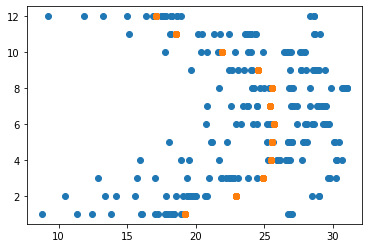

In [334]:
plt.scatter([test['mid_temp']],test['Month'])
plt.scatter([test['yhat']],test['Month'])
plt.show()


In [335]:
import pickle

In [336]:
filename = 'Cluster 15 - 12.sav'
pickle.dump(model, open(filename, 'wb'))

In [337]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(fut)

In [338]:
result.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1981-01-01,22.917667,12.525599,22.250334,22.917667,22.917667,-5.450076,-5.450076,-5.450076,-5.450076,-5.450076,-5.450076,0.0,0.0,0.0,17.467591
1,1981-02-01,22.918372,14.956664,24.344312,22.918372,22.918372,-3.410917,-3.410917,-3.410917,-3.410917,-3.410917,-3.410917,0.0,0.0,0.0,19.507455
2,1981-03-01,22.919008,18.201678,27.216726,22.919008,22.919008,-0.254680,-0.254680,-0.254680,-0.254680,-0.254680,-0.254680,0.0,0.0,0.0,22.664329
3,1981-04-01,22.919713,19.944544,29.409367,22.919713,22.919713,1.742316,1.742316,1.742316,1.742316,1.742316,1.742316,0.0,0.0,0.0,24.662029
4,1981-05-01,22.920395,20.498052,29.981275,22.920395,22.920395,2.346887,2.346887,2.346887,2.346887,2.346887,2.346887,0.0,0.0,0.0,25.267282
